In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
folder_path = 'Cat'
checkpoints_path = os.path.join(folder_path, '.ipynb_checkpoints')

In [5]:
if os.path.exists(checkpoints_path):
    try:
        if os.path.isdir(checkpoints_path):
            shutil.rmtree(checkpoints_path) 
        else:
            os.remove(checkpoints_path)
        print(f"Удалена служебная папка: {checkpoints_path}")
    except Exception as e:
        print(f"Ошибка при удалении {checkpoints_path}: {e}")
print("Актуальное содержимое папки:", os.listdir(folder_path))
print("Количество элементов после очистки:", len(os.listdir(folder_path)))

Актуальное содержимое папки: ['Bengal_Cat', 'Oriental_cat', 'Russian_blue_cat', 'Snowshoe_cat', 'Street_cats', 'The_Abyssinian_cat', 'The_British_cat', 'The_Maine_Coon_cat', 'The_Scottish_Fold', 'The_Sphinx_cat']
Количество элементов после очистки: 10


In [6]:
batch_size = 32
img_height = 256
img_width = 256

In [7]:
class_names = ['Bengal_Cat', 'Oriental_cat', 'Russian_blue_cat', 'Snowshoe_cat', 'Street_cats', 'The_Abyssinian_cat', 'The_British_cat', 'The_Maine_Coon_cat', 'The_Scottish_Fold', 'The_Sphinx_cat']

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)

In [9]:
train_generator = train_datagen.flow_from_directory(
    folder_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_names,  
    subset='training')

Found 803 images belonging to 10 classes.


In [10]:
validation_generator = train_datagen.flow_from_directory(
    folder_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_names,
    subset='validation')

Found 199 images belonging to 10 classes.


In [11]:
print(f"\nОбнаружено классов: {len(train_generator.class_indices)}")
print("Соответствие классов:", train_generator.class_indices)


Обнаружено классов: 10
Соответствие классов: {'Bengal_Cat': 0, 'Oriental_cat': 1, 'Russian_blue_cat': 2, 'Snowshoe_cat': 3, 'Street_cats': 4, 'The_Abyssinian_cat': 5, 'The_British_cat': 6, 'The_Maine_Coon_cat': 7, 'The_Scottish_Fold': 8, 'The_Sphinx_cat': 9}


In [12]:
model = keras.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),  
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax') 
])

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
epochs = 20  
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

C:\Users\User\my_jupyter_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.1502 - loss: 3.4608 - val_accuracy: 0.1055 - val_loss: 25.9566
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.1721 - loss: 2.6711 - val_accuracy: 0.0955 - val_loss: 23.1567
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.1649 - loss: 2.6521 - val_accuracy: 0.0955 - val_loss: 23.1523
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.2392 - loss: 2.4792 - val_accuracy: 0.0905 - val_loss: 20.8791
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.1742 - loss: 2.6200 - val_accuracy: 0.1005 - val_loss: 8.2171
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.1906 - loss: 2.5444 - val_accuracy: 0.1106 - val_loss: 5.5466
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.2528 - loss: 2.4055 - val_accuracy: 0.0955 - val_loss: 3.7390
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.2639 - loss: 2.2653 - val_accuracy: 0.1307 - val_l

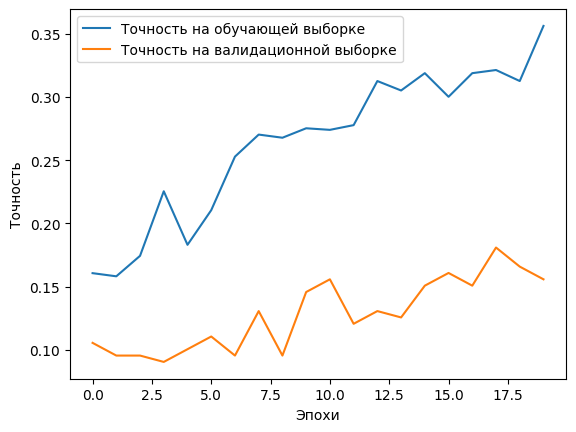

In [15]:
plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [16]:
model.save('cat_classifier_model.keras')